In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Converting CSV to Parquet 
transaction_df = pd.read_csv(r"C:\Users\HC117BC\PycharmProjects\pythonProject\NPCI\transactions\card_transaction.v1.csv")
# Convert to Parquet with optimal settings
transaction_df.to_parquet("transactions.parquet", engine="pyarrow", compression="snappy", index=False)

In [2]:
transaction_df = pd.read_parquet("transactions.parquet")

In [3]:
transaction_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,None,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,None,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,None,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,None,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,None,No


In [4]:
mcc_codes_df = pd.read_csv(r"C:\Users\HC117BC\PycharmProjects\pythonProject\NPCI\transactions\mcc_codes.csv")

In [5]:
mcc_codes_df.head()

,mcc,edited_description,combined_description,usda_description,irs_description,irs_reportable
0,742,Veterinary Services,Veterinary Services,Veterinary Services,Veterinary Services,Yes
1,763,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Co-operatives,Agricultural Cooperative,Yes
2,780,"Horticultural Services, Landscaping Services","Horticultural Services, Landscaping Services",Horticultural Services,Landscaping Services,Yes
3,1520,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors-Residential and Commercial,General Contractors,Yes
4,1711,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,Air Conditioning Contractors – Sales and Insta...,"Heating, Plumbing, A/C",Yes


In [6]:
# Display basic info
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [7]:
# Display basic info
mcc_codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   mcc                   981 non-null    int64 
 1   edited_description    981 non-null    object
 2   combined_description  973 non-null    object
 3   usda_description      706 non-null    object
 4   irs_description       963 non-null    object
 5   irs_reportable        963 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.1+ KB


In [8]:
transaction_df.isnull().sum()

User                     0
Card                     0
Year                     0
Month                    0
Day                      0
Time                     0
Amount                   0
Use Chip                 0
Merchant Name            0
Merchant City            0
Merchant State     2720821
Zip                2878135
MCC                      0
Errors?           23998469
Is Fraud?                0
dtype: int64

In [9]:
transaction_df.describe(include="all")

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,24386900,24386900,24386900,2.438690e+07,24386900,21666079,2.150876e+07,2.438690e+07,388431,24386900
unique,NaN,NaN,NaN,NaN,NaN,1440,98953,3,NaN,13429,223,NaN,NaN,23,2
top,NaN,NaN,NaN,NaN,NaN,12:31,$80.00,Swipe Transaction,NaN,ONLINE,CA,NaN,NaN,"Insufficient Balance,",No
freq,NaN,NaN,NaN,NaN,NaN,30604,250984,15386082,NaN,2720821,2591830,NaN,NaN,242783,24357143
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,NaN,NaN,NaN,-4.769230e+17,NaN,NaN,5.095644e+04,5.561171e+03,NaN,NaN
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,NaN,NaN,NaN,4.758940e+18,NaN,NaN,2.939707e+04,8.793154e+02,NaN,NaN
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,NaN,NaN,NaN,-9.222899e+18,NaN,NaN,5.010000e+02,1.711000e+03,NaN,NaN
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,NaN,NaN,NaN,-4.500543e+18,NaN,NaN,2.837400e+04,5.300000e+03,NaN,NaN
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,NaN,NaN,NaN,-7.946765e+17,NaN,NaN,4.674200e+04,5.499000e+03,NaN,NaN
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,NaN,NaN,NaN,3.189517e+18,NaN,NaN,7.756400e+04,5.812000e+03,NaN,NaN


In [10]:
mcc_codes_df.describe(include="all")

,mcc,edited_description,combined_description,usda_description,irs_description,irs_reportable
count,981.000000,981,973,706,963,963
unique,NaN,722,714,705,285,5
top,NaN,Airlines,Airlines,Financial Institutions – Manual Cash Disbursem...,Airlines,Yes
freq,NaN,128,128,2,300,810
mean,4265.234455,NaN,NaN,NaN,NaN,NaN
std,1616.143351,NaN,NaN,NaN,NaN,NaN
min,742.000000,NaN,NaN,NaN,NaN,NaN
25%,3231.000000,NaN,NaN,NaN,NaN,NaN
50%,3586.000000,NaN,NaN,NaN,NaN,NaN
75%,5094.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
# Convert Amount to float
transaction_df['Amount'] = transaction_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HC117BC\AppData\Local\Temp\ipykernel_21720\2201025539.py:2: SyntaxWarning: invalid escape sequence '\$'
  transaction_df['Amount'] = transaction_df['Amount'].replace('[\$,]', '', regex=True).astype(float)


In [12]:
# Convert time to datetime and extract features
transaction_df['Transaction_Datetime'] = pd.to_datetime(
    transaction_df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1) + " " + transaction_df['Time']
)

In [13]:
transaction_df['Transaction_Datetime'].head()

0   2002-09-01 06:21:00
1   2002-09-01 06:42:00
2   2002-09-02 06:22:00
3   2002-09-02 17:45:00
4   2002-09-03 06:23:00
Name: Transaction_Datetime, dtype: datetime64[ns]

In [14]:
transaction_df['Use Chip'].value_counts()

Use Chip
Swipe Transaction     15386082
Chip Transaction       6287598
Online Transaction     2713220
Name: count, dtype: int64

In [15]:
transaction_df['Is Fraud?'].value_counts()

Is Fraud?
No     24357143
Yes       29757
Name: count, dtype: int64

In [16]:
# Encode categorical columns
le = LabelEncoder()
transaction_df['Use Chip'] = le.fit_transform(transaction_df['Use Chip'])
transaction_df['Is Fraud?'] = transaction_df['Is Fraud?'].map({'No': 0, 'Yes': 1})

In [17]:
transaction_df['Is Fraud?'].value_counts()

Is Fraud?
0    24357143
1       29757
Name: count, dtype: int64

In [20]:
# Merge MCC codes with transactions
transaction_df = transaction_df.merge(mcc_codes_df, left_on="MCC",right_on="mcc", how="left")

In [21]:
# Encode categorical columns (Merchant State, City, etc.)
for col in ['Merchant State', 'Merchant City']:
    transaction_df[col] = le.fit_transform(transaction_df[col].astype(str))

In [23]:
# Extract time-based features
transaction_df['Hour'] = transaction_df['Transaction_Datetime'].dt.hour
transaction_df['DayOfWeek'] = transaction_df['Transaction_Datetime'].dt.dayofweek

In [26]:
# Select Features for Modeling
features = ['Amount', 'Use Chip', 'Hour', 'DayOfWeek', 'MCC', 'Merchant State', 'Merchant City']
X = transaction_df[features]
y = transaction_df['Is Fraud?']

C:\Users\HC117BC\AppData\Local\Temp\ipykernel_27364\2401454795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['blue', 'red'])


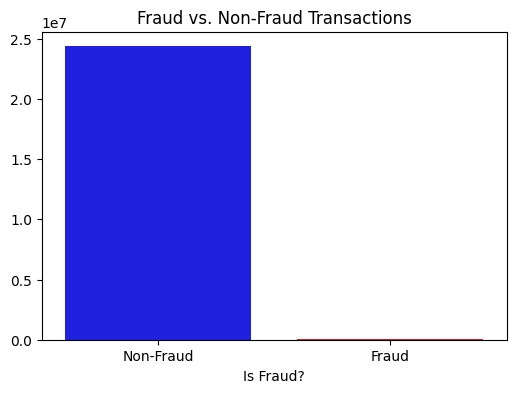

In [20]:
# ✅ Fraud vs Non-Fraud Count
fraud_counts = transaction_df['Is Fraud?'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette=['blue', 'red'])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.title("Fraud vs. Non-Fraud Transactions")
plt.show()

In [21]:
# ✅ Transactions Over Time
transaction_df.set_index('Transaction_Datetime')['Amount'].resample('M').sum().plot(figsize=(12, 5))
plt.title("Monthly Transaction Volume")
plt.ylabel("Total Amount ($)")
plt.show()

C:\Users\HC117BC\AppData\Local\Temp\ipykernel_27364\3507097237.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transaction_df.set_index('Transaction_Datetime')['Amount'].resample('M').sum().plot(figsize=(12, 5))


TypeError: no numeric data to plot

In [ ]:
# ✅ Hourly Fraud Trends
transaction_df['Hour'] = transaction_df['Transaction_Datetime'].dt.hour
fraud_by_hour = transaction_df.groupby('Hour')['Is Fraud?'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker="o")
plt.title("Fraud Rate by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Fraud Probability")
plt.grid()
plt.show()

In [ ]:
# ✅ Merchant & Location Analysis
top_merchants = transaction_df['Merchant Name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_merchants.index, x=top_merchants.values)
plt.title("Top 10 Merchants by Transaction Volume")
plt.show()

In [ ]:
top_cities = transaction_df['Merchant City'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title("Top 10 Cities by Transaction Count")
plt.show()

In [ ]:
# ✅ Fraud by Merchant State
fraud_by_state = transaction_df[transaction_df['Is Fraud?'] == 1]['Merchant State'].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(y=fraud_by_state.index, x=fraud_by_state.values, palette="Reds_r")
plt.title("Fraud Cases by Merchant State")
plt.show()

In [ ]:
# ✅ Error Analysis
top_errors = transaction_df['Errors?'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_errors.index, x=top_errors.values)
plt.title("Top 10 Transaction Errors")
plt.show()

In [ ]:
# ✅ MCC Category Fraud Analysis
fraud_by_mcc = transaction_df[transaction_df['Is Fraud?'] == "Yes"]['MCC'].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(y=fraud_by_mcc.index, x=fraud_by_mcc.values, palette="Reds_r")
plt.title("Top 10 MCC Codes for Fraudulent Transactions")
plt.show()

In [ ]:
# ✅ Summary
summary = {
    "Total Transactions": len(transaction_df),
    "Total Fraud Transactions": (transaction_df['Is Fraud?'] == "Yes").sum(),
    "Total Merchants": transaction_df['Merchant Name'].nunique(),
    "Total Merchant Cities": transaction_df['Merchant City'].nunique(),
    "Earliest Transaction Date": transaction_df['Transaction_Datetime'].min(),
    "Latest Transaction Date": transaction_df['Transaction_Datetime'].max()
}

print(pd.DataFrame(summary, index=["Values"]).T)